***Oct, 20***

In [18]:
import math
number = input('Enter a number: ')

number = int(number)

print(int(number * math.pow(2, 5)))

Enter a number: 6
192


***Oct, 24***

In [17]:
import pandas as pd
import seaborn as sns

In [27]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
#Using the tips dataset. Find me the max total bill of the table who dined on Sunday 
#and tipped at least 2$
df[(df.day == 'Sun') & (df.tip >= 2)].total_bill.max()

48.17

In [16]:
df.query("day == 'Sun' and tip >= 2").total_bill.max()

48.17

### Oct, 25

In [ ]:
import pandas as pd
import seaborn as sns

In [9]:
import prepare

In [28]:
df = sns.load_dataset('tips')

In [3]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [15]:
df.day.unique(), df.time.unique(), df['size'].unique()

(['Sun', 'Sat', 'Thur', 'Fri']
 Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'],
 ['Dinner', 'Lunch']
 Categories (2, object): ['Lunch', 'Dinner'],
 array([2, 3, 4, 1, 6, 5]))

In [29]:
dummy_col = ['sex', 'day', 'time']

In [30]:
dummies = pd.get_dummies(df[dummy_col], dummy_na=False, drop_first = True)

In [31]:
 df = pd.concat([df, dummies], axis = 1)

In [32]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0,1,1


In [34]:
df.drop(columns = ['sex', 'day', 'time'], inplace=True)

In [35]:
X_train, X_validate, X_test, y_train, y_validate, y_test = prepare.full_split(df, 'smoker')

In [36]:
X_train

,total_bill,tip,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner
173,31.85,3.18,2,0,0,0,1,1
188,18.15,3.50,3,1,0,0,1,1
165,24.52,3.48,3,0,0,0,1,1
217,11.59,1.50,2,0,0,1,0,1
221,13.42,3.48,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...
174,16.82,4.00,2,0,0,0,1,1
68,20.23,2.01,2,0,0,1,0,1
223,15.98,3.00,3,1,1,0,0,0
182,45.35,3.50,3,0,0,0,1,1


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
logit = LogisticRegression()

In [40]:
logit.fit(X_train, y_train)

LogisticRegression()

In [42]:
prediction = logit.predict(X_train)

In [43]:
prediction

array(['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No'], dtype=object)

In [44]:
y_train.mode()

0    No
Name: smoker, dtype: category
Categories (2, object): ['Yes', 'No']

In [45]:
logit.classes_

array(['No', 'Yes'], dtype=object)

In [46]:
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

          No       0.79      0.92      0.85        84
         Yes       0.82      0.62      0.70        52

    accuracy                           0.80       136
   macro avg       0.81      0.77      0.78       136
weighted avg       0.80      0.80      0.79       136



In [47]:
cm = confusion_matrix(y_train, prediction, labels=logit.classes_)

In [48]:
import evaluate

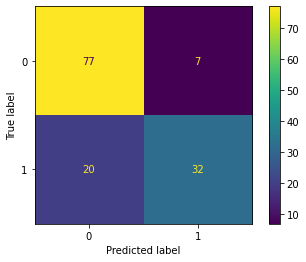

In [49]:
evaluate.display_cm(cm)

In [51]:
evaluate.count_scores(cm, 'Logit')

,Score Name,Logit
0,Accuracy,0.80
1,True Positive Rate /Recall,0.62
2,False Positive Rate,0.08
3,True Negative Rate,0.92
4,False Negative Rate,0.38
5,Precision,0.82
6,F1 Score,0.71
7,Support Positive,52.00
8,Support Negative,84.00
